In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np

# Для 3D
import matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline

In [2]:
# Матож и матрица ковариаций
a = (1, 4)
sigma = np.array([[10, 8], [8, 10]])

Плотность для гауссовского вектора $\bar{\xi}$ c вектором матожиданий $\bar{a}$ и матрицей ковариаций $\Sigma$ имеет вид:

$$p_{\bar{\xi}}(\bar{x}) = \frac{1}{(2\pi)^{\frac{n}{2}}{|\Sigma|}^{\frac{1}{2}}}e^{-\frac{1}{2}(\bar{x}-\bar{a})^{T}\Sigma^{-1}(\bar{x}-\bar{a})}, \bar{x}\in R^n$$

В нашем случае
$$
\bar{x} = \left(\begin{array}{cc}x\\y\end{array}\right)
,\ 
\bar{a} = \left(\begin{array}{cc}1\\4\end{array}\right)
,\ 
\Sigma = \left(\begin{array}{cc}10&8\\8&10\end{array}\right)
,\ 
\Sigma^{-1} = \left(\begin{array}{cc}\frac{5}{18}&-\frac{2}{9}\\-\frac{2}{9}&\frac{5}{18}\end{array}\right)
,\ 
|\Sigma| = 36
$$

Следовательно
$$
(\bar{x}-\bar{a})^T\Sigma^{-1}(\bar{x}-\bar{a}) =
\left(\begin{array}{c}
x-1&y-4
\end{array}\right)
\left(\begin{array}{cc}
\frac{5}{18}&-\frac{2}{9}\\
-\frac{2}{9}&\frac{5}{18}
\end{array}\right)
\left(\begin{array}{cc}
x-1\\
y-4
\end{array}\right) =
\frac{5}{18}(x-1)^2-\frac{4}{9}(x-1)(y-4)+\frac{5}{18}(y-4)^2
$$

Поэтому
$$p_{\bar{\xi}}(x, y) = \frac{1}{12\pi}e^{-\frac{5}{36}(x-1)^2+\frac{2}{9}(x-1)(y-4)-\frac{5}{36}(y-4)^2}$$

Далее
$$p_{\xi_2}(y) = \int_{-\infty}^{\infty} p_{\bar{\xi}}(x, y) dx = \frac{e^{-\frac{(y-4)^2}{20}}}{2\sqrt{5\pi}}$$

Отсюда
$$p_{\xi_1|\xi_2}(x|y) = \frac{p_{\bar{\xi}}(x, y)}{p_{\xi_2}(y)} = 6\sqrt{\frac{5}{\pi}}e^{-\frac{1}{180}(5x-4y+11)^2}$$

$E(\xi_1|\xi_2=y)$ находим представляя $\xi_1 = \xi_2 - \alpha \xi_2 + \alpha \xi_2$, где $\alpha$ подобрана так, чтобы $\xi_1 - \alpha \xi_2$ и $\xi_2$ были независимы. Тогда
$$E(\xi_1|\xi_2=y) = E\xi_1 + \frac{cov(\xi_1, \xi_2)}{D\xi_2}(\xi_2 - E\xi_2) = \phi(y) = 1 + \frac{4}{5}(y-4)$$

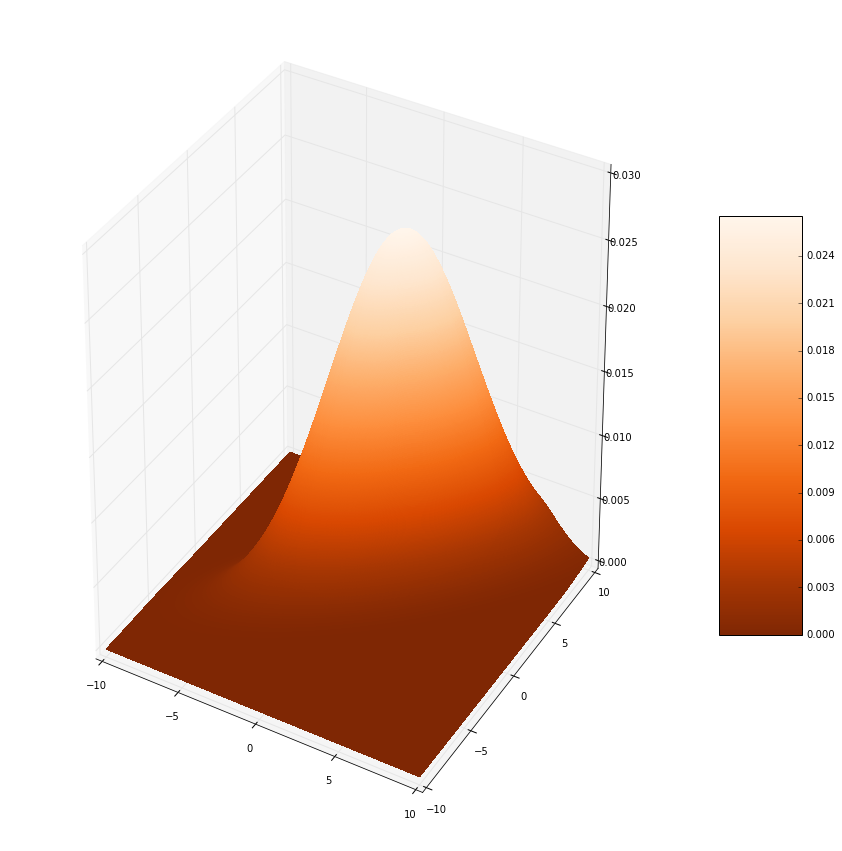

In [3]:
# Рисуем совместную плотность

def p(x, y):
    return np.exp(-(5/36) * (x - 1) ** 2 + (2/9) * (x - 1) * (y - 4) - (5/36) * (y - 4) ** 2) / (12 * np.pi)

N = 1000

X, Y = np.meshgrid(np.linspace(-10, 10, num=N), np.linspace(-10, 10, num=N))
Z = p(X, Y)

figure = plt.figure(figsize=(15,15))
axis = figure.add_subplot(1, 1, 1, projection='3d')
surface = axis.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Oranges_r', linewidth=0, antialiased=False)
figure.colorbar(surface, shrink=0.5, aspect=5)

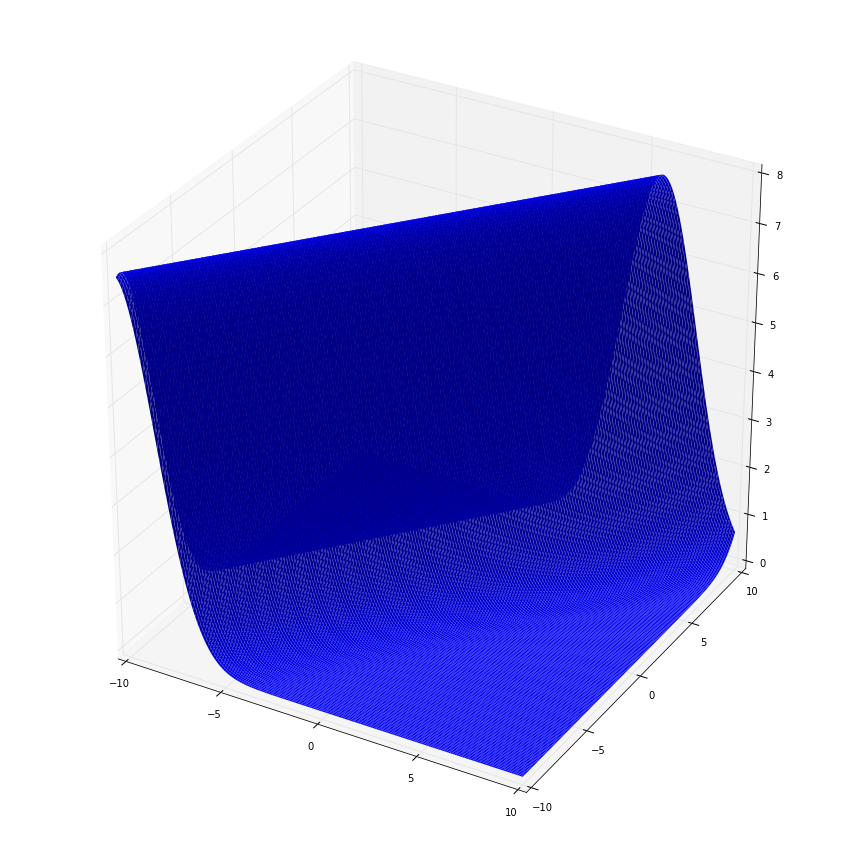

In [7]:
# Теперь надо нарисовать условную плотность

def conditionalP(x, y):
    return 6 * np.sqrt(5 / np.pi) * np.exp(-(5 * x - 4 * y + 11) ** 2 / 180)

N = 1000

X, Y = np.meshgrid(np.linspace(-10, 10, num=N), np.linspace(-10, 10, num=N))
Z = conditionalP(X, Y)

figure = plt.figure(figsize=(15,15))
axis = figure.add_subplot(1, 1, 1, projection='3d')
axis.plot_surface(X, Y, Z, rstride=5, cstride=5, linewidth=0, antialiased=True)

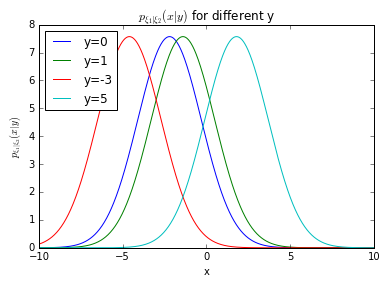

In [5]:
# Грфики усорвной плотности при некоторых значениях y

Ys = {-3, 0, 1, 5}
myFigure, myAxis = plt.subplots()
for y in Ys:
    myAxis.plot (
        np.linspace(-10, 10, num=1000),
        [conditionalP(x, y) for x in np.linspace(-10, 10, num=1000)],
        label=r"y={}".format(y)
    )
    myAxis.legend(loc="upper left")
    myAxis.set_xlabel("x")
    myAxis.set_ylabel(r"$p_{\xi_1|\xi_2}(x|y)$")
    myAxis.set_title(r"$p_{\xi_1|\xi_2}(x|y)$ for different y")

Понятно, что последние 4 плоских графика - просто проекции 3D графика

(-10, 10)

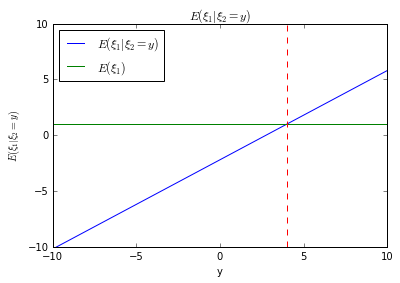

In [6]:
# Теперь график УМО

def conditionalE(y):
    return 1 + (4 / 5) * (y - 4)

myFigure, myAxis = plt.subplots()
myAxis.plot (
    np.linspace(-10, 10, num=10),
    [conditionalE(y) for y in np.linspace(-10, 10, num=10)],
    label=r"$E(\xi_1|\xi_2=y)$"
)
myAxis.plot([-10, 10], [a[0], a[0]], label=r"$E(\xi_1)$")
myAxis.plot([a[1], a[1]], [-10, 10], linestyle="dashed")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("y")
myAxis.set_ylabel(r"$E(\xi_1|\xi_2=y)$")
myAxis.set_title(r"$E(\xi_1|\xi_2=y)$")
myAxis.set_xlim(-10, 10)
myAxis.set_ylim(-10, 10)

Видим, что условное и обычное матожидания пересеклись в точке $y = E\xi_2 = 4$. Это достаточно логично.